# CLUSTERING

### Importamos las librerías

In [3]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler


### Importamos el dataset y lo limpiamos

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [5]:
filename = "nasa/event/event_wind_summary/event_wind_summary.csv"
fd = pd.read_csv(filename);
fd = clean_dataset(fd);
fd.columns

Index(['ARCHIVED_RECORD_NUMBER', 'SEISMIC_TIME_SOLS', 'ORIGINAL_FILE_NUMBER',
       'ORIGINAL_RECORD_NUMBER', 'DATA_ACQUISITION_SOL',
       'DATA_ACQUISITION_HOUR', 'DATA_ACQUSITION_MINUTE',
       'DATA_ACQUISITION_SECOND', 'MEDIAN_X_AXIS', 'FIRST_X_AXIS',
       'MAXIMUM_X_AXIS', 'MINIMUM_X_AXIS', 'RMS_X_AXIS_X100',
       'RMS_Y_AXIS_X100', 'RMS_Z_AXIS_X100', 'MEAN_X_AXIS_CROSSINGS',
       'MEAN_Y_AXIS_CROSSINGS', 'MEAN_Z_AXIS_CROSSINGS', 'METEO_TIME_SOLS',
       'WINDSPEED', 'PRESSURE', 'WIND_DIRECTION', 'AIR_TEMPERATURE',
       'WIND_SEISMIC_INTERVAL'],
      dtype='object')

In [7]:
headers = fd.columns
fd[headers[0]].mean()

136719.2179168694

In [8]:
def generaDatosSimulados(fd,numValues):  
    
    df_simulado = pd.DataFrame(); 
    headers = fd.columns; 

    for i in range(0,fd.shape[1] - 1): # -1 debido a que no queremos generar la columna TAG
        avg = fd[headers[i]].mean(); 
        std = fd[headers[i]].std();
        data = np.random.randn(numValues); 
        df_simulado[headers[i]] = data * std + avg ; 

    return df_simulado

In [9]:
simus = generaDatosSimulados(fd,10000);
simus.describe()

,ARCHIVED_RECORD_NUMBER,SEISMIC_TIME_SOLS,ORIGINAL_FILE_NUMBER,ORIGINAL_RECORD_NUMBER,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,DATA_ACQUSITION_MINUTE,DATA_ACQUISITION_SECOND,MEDIAN_X_AXIS,FIRST_X_AXIS,...,RMS_Y_AXIS_X100,RMS_Z_AXIS_X100,MEAN_X_AXIS_CROSSINGS,MEAN_Y_AXIS_CROSSINGS,MEAN_Z_AXIS_CROSSINGS,METEO_TIME_SOLS,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,137475.375439,632.733326,36340.151598,256.228411,10.573240,28.939323,29.436078,50.736215,3.017738,3.192036,...,316.694844,419.458542,14.995862,15.106869,14.973661,259.032103,3.661979,8.623783,148.017003,188.355645
std,79126.967686,286.585575,38037.025265,170.972409,8.739023,17.076470,17.192368,3.067271,4.175373,6.114990,...,514.048740,733.339517,4.895957,5.924403,5.155726,168.946838,4.257328,0.771903,104.184597,22.810094
min,-174132.818952,-421.377221,-102009.090546,-377.304654,-21.097918,-40.230437,-39.433706,39.108019,-12.403797,-21.677719,...,-1497.582549,-2321.063487,-3.160008,-10.587062,-5.758776,-356.293295,-16.735357,5.525714,-269.779577,101.131183
25%,83961.902837,438.392551,10791.514929,141.777981,4.575505,17.511596,17.612038,48.710002,0.247552,-0.845933,...,-31.607666,-75.378618,11.633778,11.080862,11.501239,148.968469,0.760563,8.111921,79.485540,173.136399
50%,137371.018660,637.487666,36299.371291,258.826984,10.575141,28.937287,29.322124,50.719966,3.029226,3.240766,...,317.071077,421.363964,14.996752,15.176221,14.968035,259.331938,3.567886,8.621089,146.889678,188.364508
75%,191225.504699,823.491894,61903.709954,371.022814,16.526496,40.335612,41.158489,52.811416,5.810877,7.267314,...,664.453879,915.018667,18.296855,19.121708,18.462544,372.324920,6.563545,9.137812,218.020523,203.456198
max,443365.182574,1801.373395,172126.235287,989.773556,42.765905,95.925752,99.775702,62.890093,18.519203,24.488086,...,2258.809336,3086.102027,32.725832,37.077662,36.077756,896.753570,21.000750,11.577585,555.851825,290.900607


In [10]:
fd.describe()

,ARCHIVED_RECORD_NUMBER,SEISMIC_TIME_SOLS,ORIGINAL_FILE_NUMBER,ORIGINAL_RECORD_NUMBER,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,DATA_ACQUSITION_MINUTE,DATA_ACQUISITION_SECOND,MEDIAN_X_AXIS,FIRST_X_AXIS,...,RMS_Z_AXIS_X100,MEAN_X_AXIS_CROSSINGS,MEAN_Y_AXIS_CROSSINGS,MEAN_Z_AXIS_CROSSINGS,METEO_TIME_SOLS,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,WIND_SEISMIC_INTERVAL
count,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,...,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,273329.000000,2.733290e+05
mean,136719.217917,629.948926,36677.267023,257.094549,10.423230,29.075649,29.491426,50.710397,3.041126,3.246999,...,432.657182,15.004584,15.017228,15.006728,257.537215,3.670592,8.637288,148.088377,188.117580,3.341293e+04
std,78928.125587,285.678339,37939.148097,169.725737,8.817766,17.209966,17.325602,3.111862,4.200320,6.110409,...,734.231131,4.877313,5.994735,5.186232,169.670855,4.298901,0.779050,104.749246,22.850315,1.640361e+05
min,1.000000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-127.000000,-128.000000,...,0.000000,0.000000,0.000000,0.000000,0.264100,0.000000,1.959000,0.000000,49.800000,0.000000e+00
25%,68413.000000,408.000000,12648.000000,123.000000,2.000000,14.000000,14.000000,51.000000,2.000000,1.000000,...,127.000000,13.000000,12.000000,13.000000,123.060200,1.550000,7.800000,62.700000,170.800000,3.000000e+00
50%,136716.000000,631.000000,26787.000000,214.000000,7.000000,29.000000,29.000000,51.000000,2.000000,2.000000,...,150.000000,15.000000,15.000000,15.000000,214.078800,2.620000,8.840000,122.300000,185.600000,1.000000e+01
75%,205073.000000,903.000000,44795.000000,412.000000,20.000000,44.000000,45.000000,51.000000,2.000000,3.000000,...,362.000000,17.000000,18.000000,17.000000,412.843400,4.700000,9.100000,222.800000,200.300000,2.700000e+01
max,273420.000000,1049.000000,239288.000000,560.000000,24.000000,59.000000,60.000000,51.000000,119.000000,127.000000,...,12286.000000,31.000000,31.000000,31.000000,560.278100,531.110000,10.700000,360.000000,337.300000,1.446240e+06


### Normalizamos el dataset completo

In [11]:
#df_norm = ( fd - fd.min()) / ( fd.max() - fd.min() )
df_norm = StandardScaler().fit_transform(fd.astype(float))
df_norm= pd.DataFrame(df_norm, columns=fd.columns)

### Buscamos grupos de variables dependientes

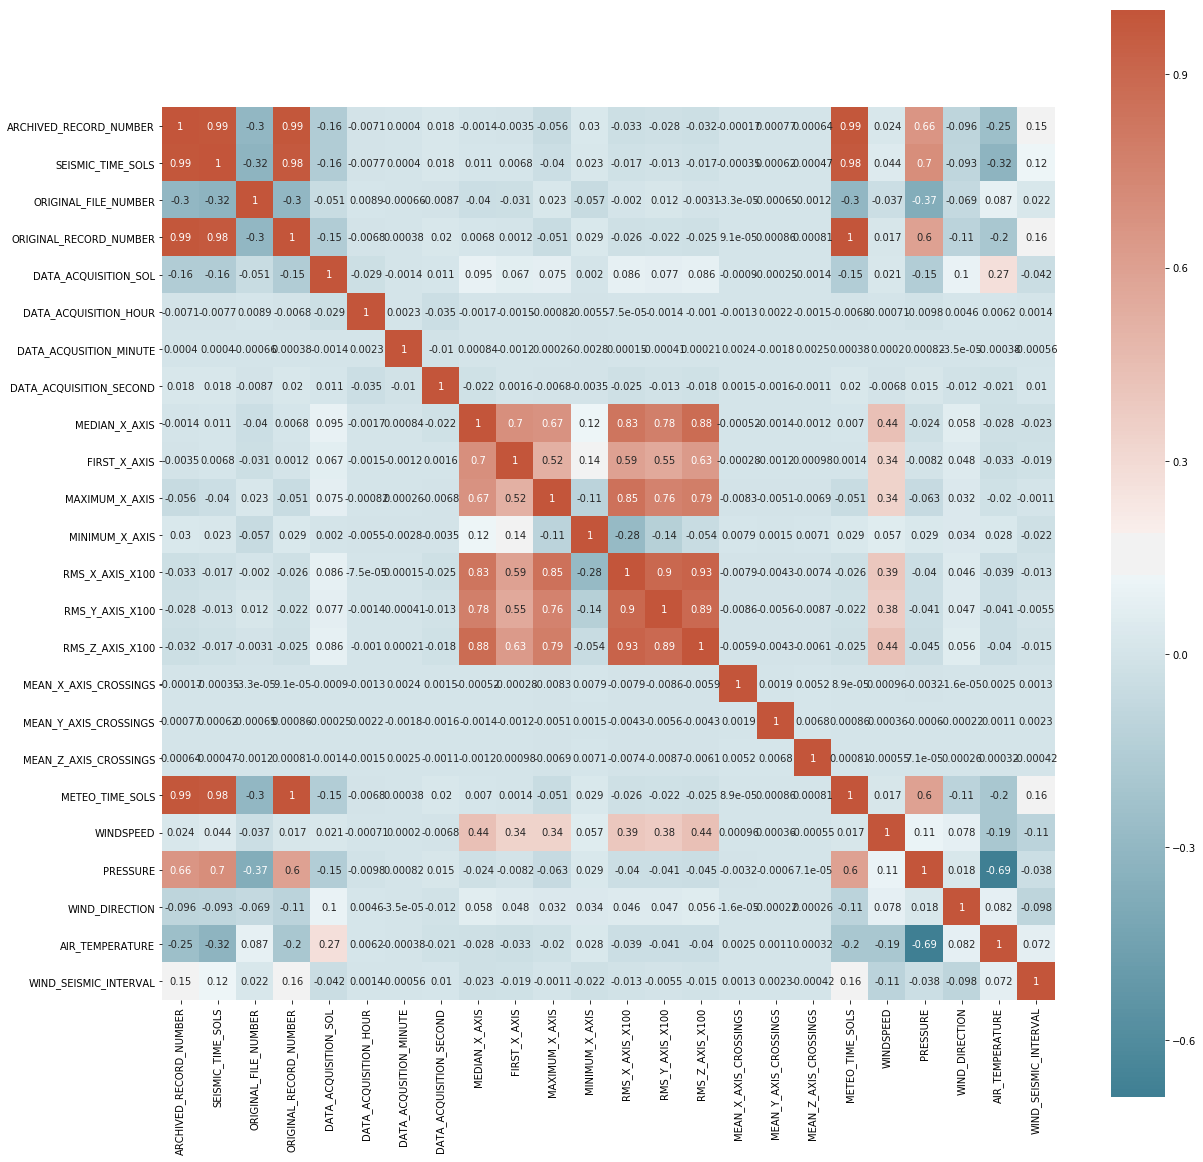

In [12]:
f, ax = plt.subplots(figsize=(20,20)) 
corr = df_norm.corr()
sns.heatmap(corr,square=True ,cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax , annot = True) 

# Generamos los grupos con variable tiempo independiente

In [13]:
#GRUPO 1 -> SISMOGRAFO Y VIENTO
gp_1 = ['RMS_X_AXIS_X100','WINDSPEED']

#GRUPO 2 -> PRESION Y TEMPERATURA
gp_2 = ['PRESSURE','AIR_TEMPERATURE']

#GRUPO 3 ( VARIABLES INDEPENDIENTES ) -> NO SE APLICA PCA SOBRE ESTOS
gp_3 = ['MEAN_X_AXIS_CROSSINGS',
       'MEAN_Y_AXIS_CROSSINGS', 'MEAN_Z_AXIS_CROSSINGS','WIND_DIRECTION']

### Aplicamos PCA para modelo con tiempo independiente y creamos el nucleo de entrenamiento

In [14]:
# Indicamos el numero de columnas que tiene que salir 
sklearn_pca = sklearnPCA(n_components=1)

# Aplicamos PCA para los dos conjuntos que hemos hecho a partir de analisis de correlaciones
datos_pca_gp_1 = sklearn_pca.fit_transform(df_norm[gp_1])
datos_pca_gp_2 = sklearn_pca.fit_transform(df_norm[gp_2])

# Unimos para formar el dataset de entrenamiento del algoritmo de clustering

core = df_norm[gp_3]; 
core['sismo'] = datos_pca_gp_1; 
core['pre_temp'] = datos_pca_gp_2; 
core[core == np.nan].count()

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


MEAN_X_AXIS_CROSSINGS    0
MEAN_Y_AXIS_CROSSINGS    0
MEAN_Z_AXIS_CROSSINGS    0
WIND_DIRECTION           0
sismo                    0
pre_temp                 0
dtype: int64

### Creamos el modelo K-Means con variable tiempo independiente, lo entrenamos y sacamos las etiquetas

In [15]:
# Entrenamos el modelo
model_kmeans = KMeans(n_clusters=4).fit(core)

# Sacamos los centroides
centroids = model_kmeans.cluster_centers_

# Sacamos los tags del dataset
labels = model_kmeans.predict(core)


In [16]:
# Asignamos las categorias al dataset original sin normalizar

fd["TAG_KM"] = labels; 


In [17]:
fd.groupby("TAG_KM").mean()

,ARCHIVED_RECORD_NUMBER,SEISMIC_TIME_SOLS,ORIGINAL_FILE_NUMBER,ORIGINAL_RECORD_NUMBER,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,DATA_ACQUSITION_MINUTE,DATA_ACQUISITION_SECOND,MEDIAN_X_AXIS,FIRST_X_AXIS,...,RMS_Z_AXIS_X100,MEAN_X_AXIS_CROSSINGS,MEAN_Y_AXIS_CROSSINGS,MEAN_Z_AXIS_CROSSINGS,METEO_TIME_SOLS,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,WIND_SEISMIC_INTERVAL
TAG_KM,,,,,,,,,,,,,,,,,,,,,
0,151113.258858,698.495274,31121.756288,291.983638,12.274667,29.029628,29.552153,50.703223,14.327621,15.447571,...,2508.450445,14.932674,14.966337,14.930739,292.501353,11.137984,8.760425,166.254276,178.995622,8348.572439
1,154443.541362,711.256628,28839.054986,279.744046,9.507169,29.016300,29.476919,50.691777,2.252318,2.491278,...,286.868540,14.988950,15.024674,14.989317,280.149523,4.323051,9.253009,277.980083,168.992383,74.511786
2,178286.757661,785.915178,27045.439520,346.920267,8.998169,28.941129,29.498423,50.796081,2.211077,2.345392,...,270.590688,15.006785,15.013095,15.014664,347.305053,3.052012,8.997923,87.652212,181.078272,60053.460962
3,57187.657285,319.208744,57887.172212,93.939792,12.808804,29.334115,29.475562,50.588478,2.281683,2.373618,...,308.226055,15.026909,15.030678,15.022029,94.479372,2.559825,7.665404,159.778403,212.947486,17496.013417


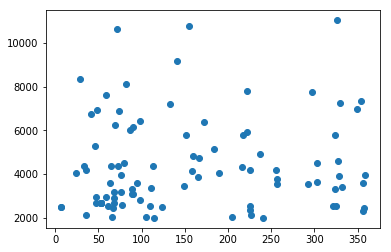

In [60]:
less_0 = fd[fd.TAG_KM == 0];
less_0 = less_0[less_0.WINDSPEED <= 1]
fig = plt.figure()
#plt.scatter(less_0['WINDSPEED'], less_0['RMS_X_AXIS_X100'])
plt.scatter(less_0['WIND_DIRECTION'], less_0['RMS_X_AXIS_X100'])

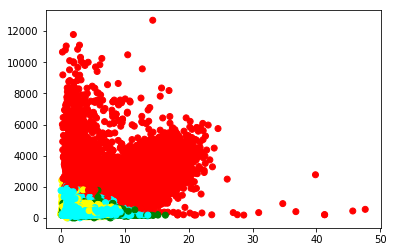

In [66]:
colores=['red','green','cyan','yellow']


less = fd[fd.WINDSPEED <= 50]
labels_xx = less["TAG_KM"]
asignar=[]
for row in labels_xx:
    asignar.append(colores[row])
    
fig = plt.figure()
plt.scatter(less['WINDSPEED'], less['RMS_X_AXIS_X100'], c=asignar)


In [69]:
seen = ["WINDSPEED","PRESSURE","RMS_X_AXIS_X100","AIR_TEMPERATURE","MEAN_X_AXIS_CROSSINGS","TAG_KM" ]
seen_fd = less[seen]
seen_fd.groupby("TAG_KM").mean()

,WINDSPEED,PRESSURE,RMS_X_AXIS_X100,AIR_TEMPERATURE,MEAN_X_AXIS_CROSSINGS
TAG_KM,,,,,
0,10.725914,8.760589,1996.095520,179.040251,14.931059
1,4.323051,9.253009,290.825667,168.992383,14.988950
2,3.052012,8.997923,277.735324,181.078272,15.006785
3,2.559825,7.665404,304.632323,212.947486,15.026909


In [68]:
seen_fd.groupby("TAG_KM").count()

,WINDSPEED,PRESSURE,RMS_X_AXIS_X100,AIR_TEMPERATURE,MEAN_X_AXIS_CROSSINGS
TAG_KM,,,,,
0,18059,18059,18059,18059,18059
1,48958,48958,48958,48958,48958
2,126158,126158,126158,126158,126158
3,80122,80122,80122,80122,80122


## CLASIFICADORES

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib 
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

from scipy import linalg
from scipy.stats import multivariate_normal
import itertools
import time
from itertools import combinations
from IPython.display import Image

from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set(style='white')

In [53]:
class_in = ['WINDSPEED','AIR_TEMPERATURE','PRESSURE','RMS_X_AXIS_X100']; 
class_out = ['TAG_KM']; 

In [54]:
print(fd.groupby('TAG_KM').size())

TAG_KM
0    118361
1     55395
2     24821
3      5447
4     69305
dtype: int64


### LDA & QDA

In [55]:
X = fd[class_in]
y = fd[class_out]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

lda = LinearDiscriminantAnalysis(store_covariance=True)#, priors=[1,1,1])
qda = QuadraticDiscriminantAnalysis(store_covariance=True)#, priors=[1,1,1])

t = time.time()
lda.fit(X_train, y_train)
fittime_lda = time.time()-t

t = time.time()
qda.fit(X_train, y_train)
fittime_qda = time.time()-t

t = time.time()
lda.predict(X_test)
infertime_lda = time.time() - t

t = time.time()
qda.predict(X_test)
infertime_qda = time.time() - t


print('LDA accuracy train={:.2%}, test: {:.2%}, fit time {:.2f}s, predict time {:.2f}s'.format(
    lda.score(X_train, y_train), lda.score(X_test, y_test), fittime_lda, infertime_lda))
print('QDA accuracy train={:.2%}, test: {:.2%}, fit time {:.2f}s, predict time {:.2f}s'.format(
    qda.score(X_train, y_train), qda.score(X_test, y_test), fittime_qda, infertime_qda))

A:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
A:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA accuracy train=75.86%, test: 75.74%, fit time 0.15s, predict time 0.01s
QDA accuracy train=74.18%, test: 74.34%, fit time 0.04s, predict time 0.03s


### KNN

In [58]:
from sklearn.model_selection import GridSearchCV

In [56]:
%time knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

Wall time: 139 ms


A:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [57]:
%time knn_predictions = knn.predict(X_test)

Wall time: 2.44 s


In [59]:
kvals = [10, 50, 100]
t = time.time()
knn = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': kvals},
    cv=5).fit(X_train, y_train)
runtime_knn = time.time()-t

A:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
A:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
A:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
A:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [60]:
%timeit predictions = knn.predict(X_test)

3.5 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
print("Best k:", knn.best_params_['n_neighbors'])
print('kNN Test Score:', knn.score(X_test, y_test), ', runtime= ', runtime_knn)

Best k: 50
kNN Test Score: 0.7536622129864048 , runtime=  33.54636883735657


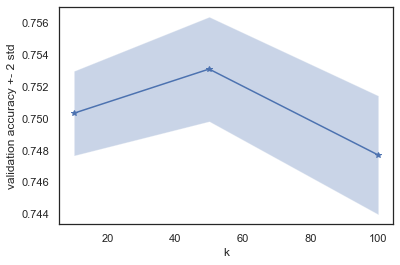

In [62]:
plt.plot(kvals, knn.cv_results_['mean_test_score'], '-*')
plt.fill_between(
    kvals,
    knn.cv_results_['mean_test_score'] - 2 * knn.cv_results_['std_test_score'],
    knn.cv_results_['mean_test_score'] + 2 * knn.cv_results_['std_test_score'],
    alpha=.3)
plt.xlabel('k')
plt.ylabel('validation accuracy +- 2 std');